In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix

warnings.filterwarnings("ignore")

In [2]:
zoo = pd.read_csv("zoo.csv")
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
zoo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


Text(0, 0.5, 'Count')

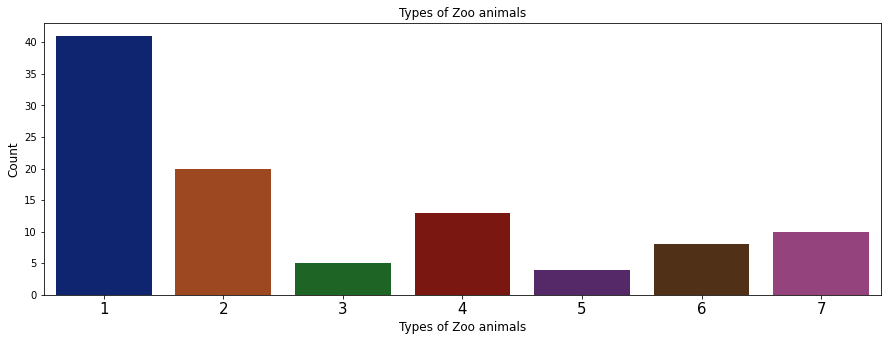

In [4]:
plt.figure(figsize=(15, 5))
    
plt.title("Types of Zoo animals")
sns.countplot(data=zoo, x="type",palette = "dark")
plt.xticks(rotation = 0, size = 15)
plt.xlabel("Types of Zoo animals", fontsize=12)
plt.ylabel("Count", fontsize=12)

In [5]:
def sinplot(flip=5):
    x = np.linspace(0, 18, 100)
    for i in range(1, 16):
        plt.plot(x, np.sin(x + i * .5) * (16 - i) * flip)
        

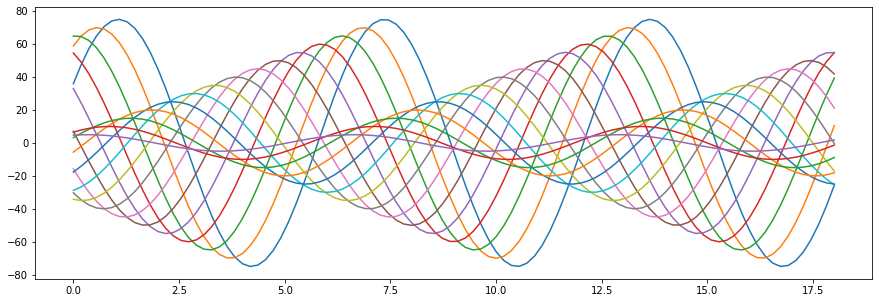

In [6]:
plt.figure(figsize=(15, 5))
sinplot()

<AxesSubplot:>

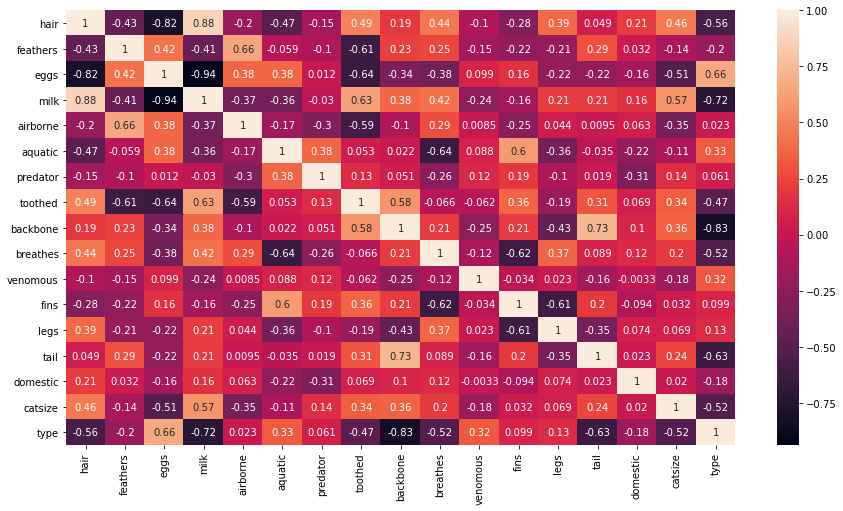

In [7]:
plt.figure(figsize=(15,8))
sns.heatmap(zoo.corr(),annot=True)

Text(0.5, 1.0, 'Correlation with zoo animal type \n')

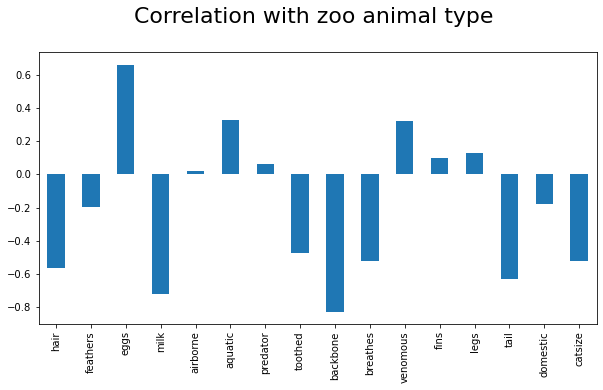

In [8]:
data = zoo.iloc[:,:-1]

correlations = data.corrwith(zoo.type)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (10, 5))
plt.title('Correlation with zoo animal type \n',horizontalalignment="center", fontsize = "22")

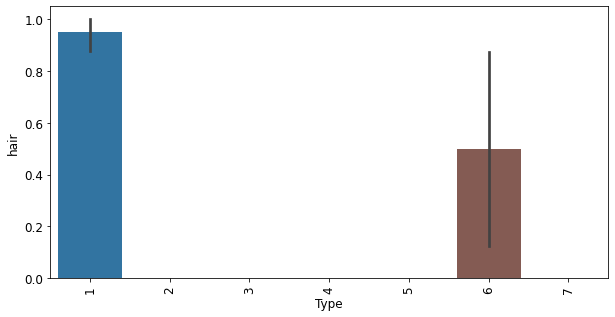

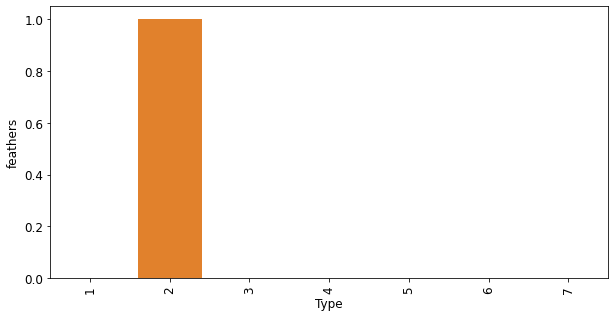

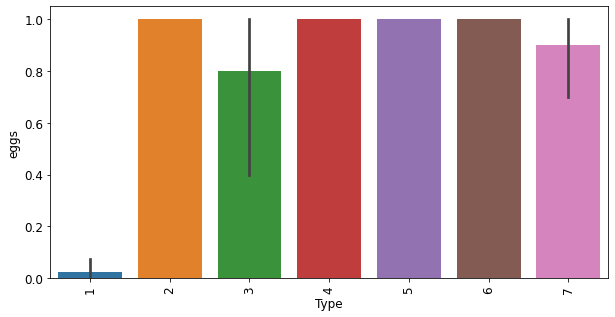

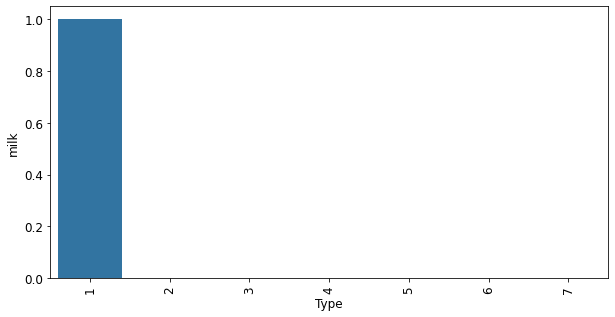

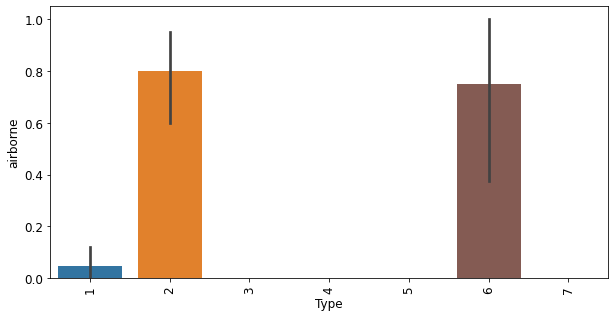

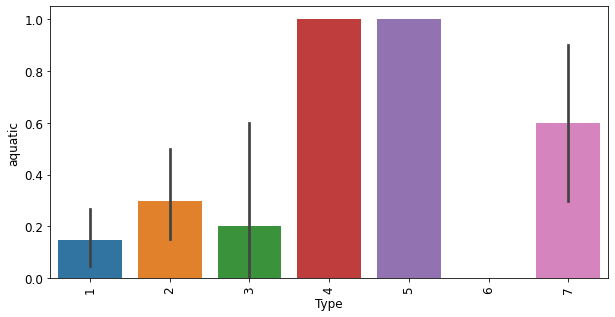

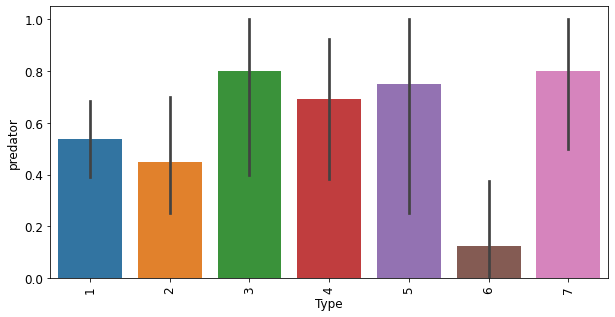

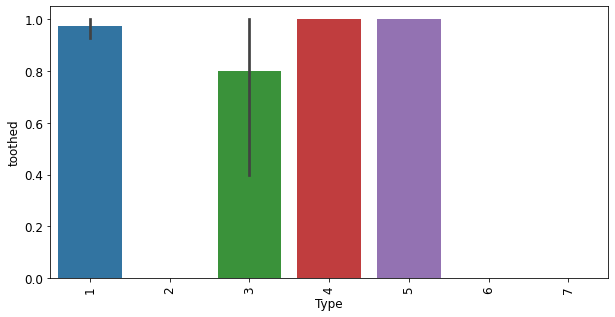

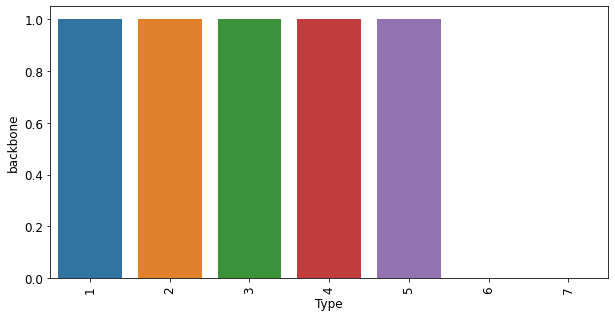

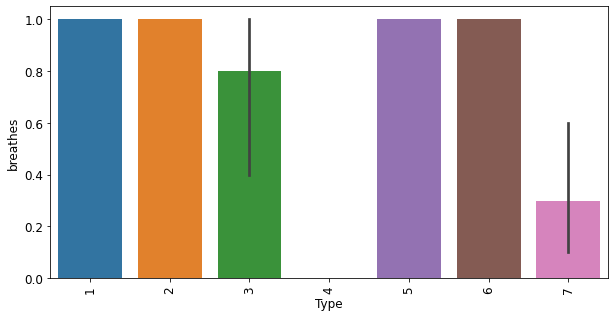

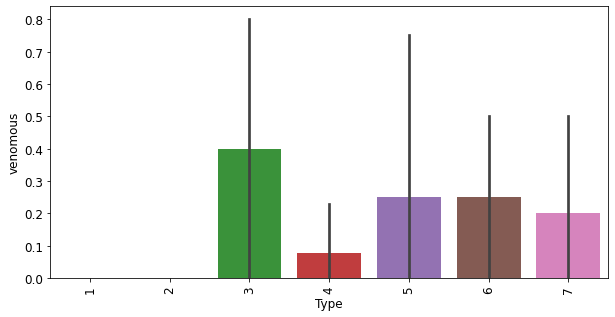

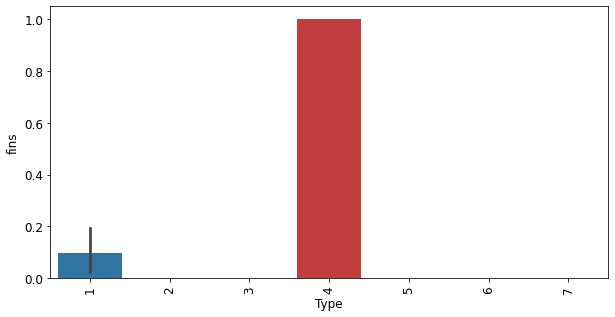

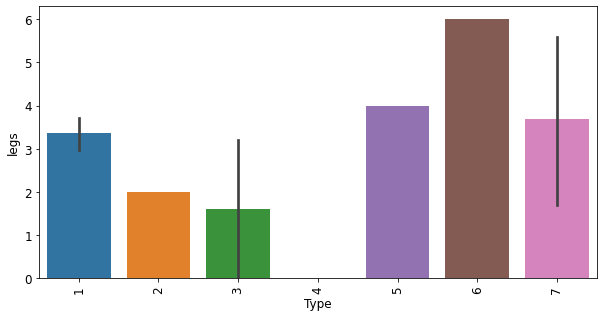

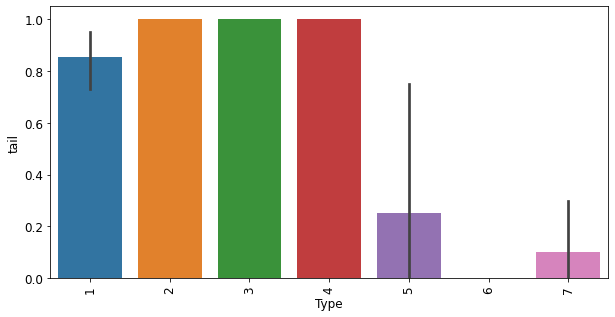

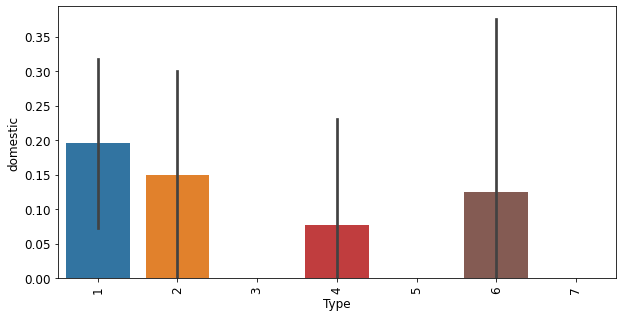

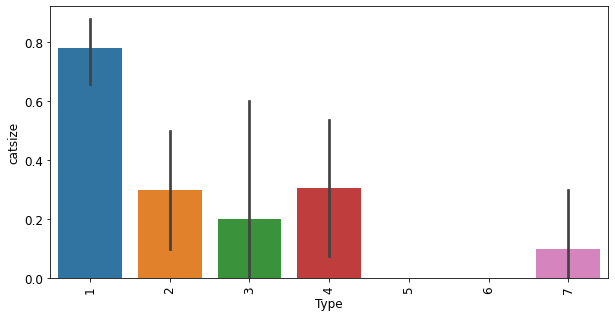

In [9]:
for i in zoo.columns[1:-1]:
    plt.figure(figsize=(10,5))
    sns.barplot(x = 'type', y= i,data = zoo)
    plt.xticks(rotation = 90, size = 12)
    plt.yticks(size = 12)
    plt.xlabel('Type',fontsize=12)
    plt.ylabel(i, fontsize=12)

    plt.show()

In [10]:
zoo_data = zoo.drop('animal name', axis = 1)
zoo_data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [11]:
X = zoo_data.drop('type', axis = 1)
y = zoo_data['type']

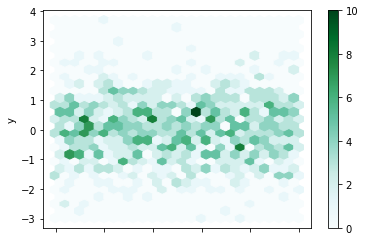

In [12]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=["X", "y"])

df["X"] = df["y"] + np.arange(1000)

df.plot.hexbin(x="X", y="y", gridsize=25);


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

In [14]:
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (75, 16)
Shape of X_test:  (26, 16)
Shape of y_train:  (75,)
Shape of y_test:  (26,)


In [15]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, y_train)

pred = model.predict(X_test)
acc= accuracy_score(y_test,pred)
print("The accuracy is  {}".format(acc))

The accuracy is  1.0


Classification Report                precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



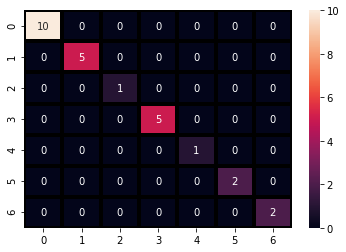

In [16]:
sns.heatmap(confusion_matrix(y_test, pred),annot=True,fmt = "d",linecolor="k",linewidths=3)
print('Classification Report ',classification_report(y_test,pred))

In [17]:
pred_df = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred})
pred_df.head(15)

,Actual,Predicted
26,5,5
86,4,4
2,4,4
55,1,1
75,1,1
94,1,1
16,2,2
73,4,4
54,1,1
96,1,1


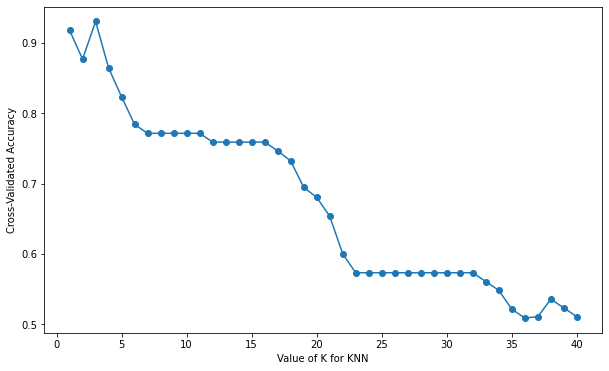

In [18]:
import matplotlib.pyplot as plt 
%matplotlib inline

# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(10,6))
plt.plot(k_range, k_scores, marker ="o")
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [19]:
# parameters selection
kf = KFold(n_splits=10)
grid_params ={
    'n_neighbors':[1,2,3,4,5,6],
    'weights':['uniform','distance'],
    'metric' :['eclidean', 'manhattan']
}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose =10, cv=6,n_jobs=-1)
gs_results = gs.fit(X_train, y_train)

Fitting 6 folds for each of 24 candidates, totalling 144 fits


In [20]:
gs_results.best_score_


0.9476495726495727

In [21]:
gs_results.best_estimator_


KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [22]:
model_final = gs_results.best_estimator_


pred_final = model_final.predict(X_test)
acc_final= accuracy_score(y_test,pred_final)
print("The accuracy is  {}".format(acc_final))

The accuracy is  1.0


Classification Report                precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



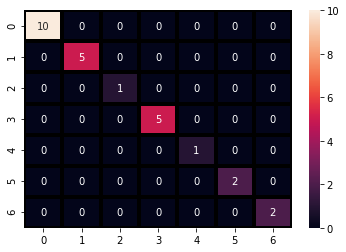

In [23]:
sns.heatmap(confusion_matrix(y_test, pred_final),annot=True,fmt = "d",linecolor="k",linewidths=3)
print('Classification Report ',classification_report(y_test,pred_final))
